# Linear Discriminant Analysis

Libraries

In [9]:
import numpy as np  # linear algebra
import scipy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
number_of_persons = 40

In [10]:
def read_single_image(image_path):
    ans = []
    with open(image_path, 'rb') as f:
        assert f.readline() == b'P5\n'
        assert f.readline() == b'92 112\n'
        assert f.readline() == b'255\n'

        for i in range(10304):
            ans.append(ord(f.read(1)))

    return ans

# Create the Data Matrix and Label Vector

In [11]:
def construct_data_frame():
    images = []
    persons = []

    path = "C:\\Users\\DELL\\Desktop\\Pattern_Lab1\\archive\\"
    print('Reading Started')
    for x in range(1, number_of_persons + 1):
        current_person_path = path + 's' + str(x) + '/'
        for y in range(1, 11):
            persons.append(str(x))
            images.append(read_single_image(current_person_path + str(y) + '.pgm'))

    images = np.array(images)

    return images, persons

# Split Data odd rows for training and even rows for testing

In [12]:
def split_data(D, labels):
    train_Data = []
    train_Label = []
    test_Data = []
    test_Label = []
    for i in range(len(D)):
        if i % 2 == 1:
            train_Data.append(D[i])
            train_Label.append(labels[i])
        else:
            test_Data.append(D[i])
            test_Label.append(labels[i])
    return np.array(train_Data), np.array(train_Label), np.array(test_Data), np.array(test_Label)

# Split Data 70% for training and 30% for testing

In [13]:
def split_data_70_30(D, labels):
    train_Data = []
    train_Label = []
    test_Data = []
    test_Label = []
    for i in range(len(D)):
        if i % 10 <= 6:
            train_Data.append(D[i])
            train_Label.append(labels[i])
        else:
            test_Data.append(D[i])
            test_Label.append(labels[i])
    return np.array(train_Data), np.array(train_Label), np.array(test_Data), np.array(test_Label)

# LDA

In [14]:
def LDA(Data, label, eigen_values_count=39):
    print(eigen_values_count)
    Data = np.array(Data)
    label = np.array(label)
    unique_values, count = np.unique(label, return_counts=True)
    number_of_classes = len(np.unique(label))
    print("Number of Classes = ", number_of_classes)
    number_of_features = len(Data[0])

    # Calculate Means for every class
    means = np.zeros((number_of_classes, number_of_features))

    for i in range(1, number_of_classes + 1):
        data = Data[np.where(label == str(i))]
        meanI = np.mean(data, axis=0)
        means[i - 1] = meanI

    # Calculate mean for each feature
    mean = np.mean(Data, axis=0)

    # Calculate Sb
    Sb = np.zeros((number_of_features, number_of_features))
    for i in range(number_of_classes):
        x = np.array(means[i] - mean).reshape(number_of_features, 1)
        y = x.dot(x.T) * count[i]
        Sb = np.add(Sb, y)

    # Calculate S
    S = np.zeros((number_of_features, number_of_features))
    for i in range(number_of_classes):
        dataI = Data[label == str(i + 1)]
        Zi = np.array(dataI - means[i])
        S += Zi.T.dot(Zi)

    # Calculate Eigen Values and Eigen Vectors

    inverse = scipy.linalg.pinv(S)

    X = inverse.dot(Sb)

    eigen_Values, eigen_Vectors = np.linalg.eig(X)

    idx = eigen_Values.argsort()[::-1]
    eigen_Values = eigen_Values[idx]
    eigen_Vectors = eigen_Vectors[:, idx]
    print("Eigen Values = ", eigen_Values)
    print("Eigen Vectors = ", eigen_Vectors)
    eigen_Vectors = np.real(eigen_Vectors)

    U = eigen_Vectors[:, 0:eigen_values_count]
    print("U = ",U)
    return U

# Calculate the Accuracy using KNN classifier using different Ks and Plot a graph

In [15]:
def calc_Accuracy(Projected_train_Data, Projected_test_Data, train_Label, test_Label):
    K = [1, 3, 5, 7]
    accuracies = []

    for i in K:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(Projected_train_Data, train_Label)
        predicted_labels = knn.predict(Projected_test_Data)
        acc = accuracy_score(test_Label, predicted_labels)
        accuracies.append(acc)

        print("Accuracy = ", acc, "  at k = ", i)

    # Plotting accuracy against K
    plt.plot(K, accuracies, marker='o')
    plt.title('Accuracy vs. K')
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.xticks(K)
    plt.grid(True)
    plt.show()

# RUN LDA and project the training and test Data using the 39 Eigen Vectors corresponding to the Highest 39 Eigen Values then calculate the Accuracy

Reading Started


39
Number of Classes =  40
Eigen Values =  [ 2.26008529e+01+0.00000000e+00j  1.54955104e+01+0.00000000e+00j
  1.06728699e+01+0.00000000e+00j ... -2.51809162e-15+1.97848457e-15j
 -2.51809162e-15-1.97848457e-15j -2.75496911e-15+0.00000000e+00j]
Eigen Vectors =  [[ 0.00195963+0.j         -0.00656164+0.j         -0.00088356+0.j
  ... -0.0021747 +0.01170303j -0.0021747 -0.01170303j
  -0.00918936+0.j        ]
 [ 0.00368616+0.j         -0.0035659 +0.j          0.00082478+0.j
  ...  0.0072192 -0.00332854j  0.0072192 +0.00332854j
  -0.01542705+0.j        ]
 [-0.00057438+0.j         -0.0071894 +0.j         -0.00175051+0.j
  ... -0.00506525-0.01204907j -0.00506525+0.01204907j
  -0.00423835+0.j        ]
 ...
 [ 0.03767583+0.j         -0.01090378+0.j         -0.01600198+0.j
  ... -0.01677462-0.01620579j -0.01677462+0.01620579j
   0.04250536+0.j        ]
 [ 0.02422824+0.j          0.00305271+0.j         -0.02169073+0.j
  ... -0.00021549-0.00547236j -0.00021549+0.00547236j
   0.00404241+0.j        ]


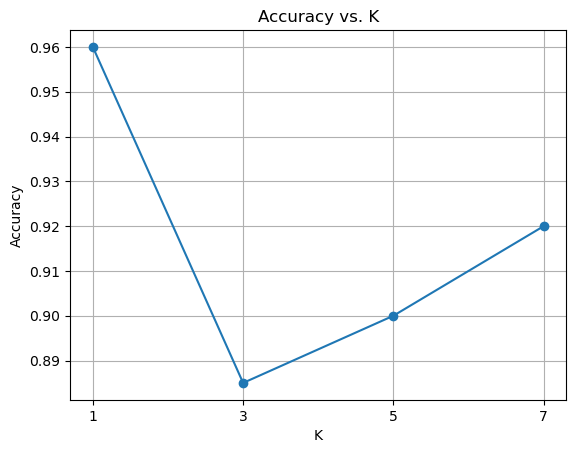

In [16]:
(D, labels) = construct_data_frame()


(train_Data, train_Label, test_Data, test_Label) = split_data(D, labels)

U = LDA(train_Data, train_Label, eigen_values_count=39)

Projected_train_Data = train_Data.dot(U)  # ==  ((U.T).dot(train_Data.T)).T
Projected_test_Data = test_Data.dot(U)

calc_Accuracy(Projected_train_Data, Projected_test_Data,train_Label ,test_Label)

# BONUS A)

Reading Started
39
Number of Classes =  40
Eigen Values =  [ 2.91329329e+01+0.00000000e+00j  1.96431320e+01+0.00000000e+00j
  1.40697588e+01+0.00000000e+00j ... -3.23940606e-15+1.16852868e-15j
 -3.23940606e-15-1.16852868e-15j -4.93915201e-15+0.00000000e+00j]
Eigen Vectors =  [[-0.00431265+0.j          0.00120864+0.j         -0.00490706+0.j
  ... -0.01917071+0.01327531j -0.01917071-0.01327531j
   0.00330875+0.j        ]
 [-0.00031091+0.j         -0.00105019+0.j         -0.00707077+0.j
  ... -0.01027339-0.00464043j -0.01027339+0.00464043j
   0.01975946+0.j        ]
 [-0.00046923+0.j         -0.00203809+0.j         -0.00604414+0.j
  ...  0.01701593+0.00961602j  0.01701593-0.00961602j
   0.00252792+0.j        ]
 ...
 [ 0.02348746+0.j          0.00689234+0.j         -0.01550597+0.j
  ...  0.00035532+0.00458718j  0.00035532-0.00458718j
   0.00614287+0.j        ]
 [ 0.02082171+0.j          0.01065187+0.j         -0.00321983+0.j
  ...  0.01682525-0.01213098j  0.01682525+0.01213098j
   0.001637

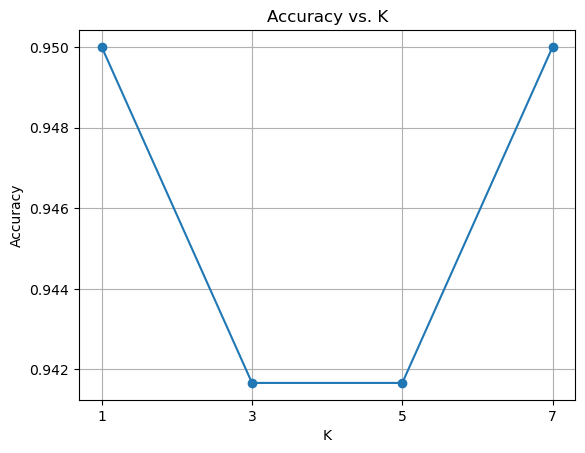

In [17]:
(D, labels) = construct_data_frame()


(train_Data, train_Label, test_Data, test_Label) = split_data_70_30(D, labels)

U = LDA(train_Data, train_Label, eigen_values_count=39)

Projected_train_Data = train_Data.dot(U)  # ==  ((U.T).dot(train_Data.T)).T
Projected_test_Data = test_Data.dot(U)

calc_Accuracy(Projected_train_Data, Projected_test_Data,train_Label ,test_Label)